In [684]:
# importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as st

In [765]:
#importing and cleaning Eurostat information on mean age at first marriage

eu_mean_age_marriages = pd.read_excel("./sources/Eurostat_mean_age.xls", header = 3, indexcol=0, skipfooter = 5)
cols = eu_mean_age_marriages.columns.drop(['Country',"Sex", "Region"])
eu_mean_age_marriages[cols] = eu_mean_age_marriages[cols].apply(pd.to_numeric, errors='coerce')


In [766]:
# Selecting South Europe region for testing
eu_south = eu_mean_age_marriages[eu_mean_age_marriages.Region == "South Europe"]
eu_south.set_index(["Region","Country", "Sex"], inplace = True)
eu_south = eu_south.interpolate(axis=1)
eu_south_new = eu_south.reset_index()

In [789]:
# Selecting Eastern Europe region for testing
eastern = eu_mean_age_marriages[eu_mean_age_marriages.Region == "Eastern Europe"]
eastern.set_index(["Region","Country", "Sex"], inplace = True)
eastern = eastern.interpolate(axis=1)
eastern_new = eastern.reset_index()


In [757]:
# calculating mean age at first marriage for Europe and selecting 2017
eu_mean_age_marriages.mean()["2017"]

30.980597014925376

In [966]:
# confidence interval for mena age of eastern europe at 95% confidence level
st.t.interval(0.95, 26, loc=eastern.groupby("Region").mean()["2017"], scale=st.sem(eastern["2017"]))

(array([28.40425299]), array([30.42537664]))

In [967]:
# t test for Easter Europe
#H0 Mean age at first marriage in eastern europe is the same as the average of Europe
#H1 Mean age is differrent
st.ttest_1samp(eastern["2017"], eu_mean_age_marriages["2017"].mean())

Ttest_1sampResult(statistic=-3.8910550378534747, pvalue=0.0006207385212685326)

In [968]:
# confidence level for South Europe
st.t.interval(0.95, 11, loc=eu_south.groupby("Region").mean()["2017"], scale=st.sem(eu_south["2017"]))

(array([31.29812945]), array([33.70187055]))

In [779]:
st.ttest_1samp(eu_south["2017"], eu_mean_age_marriages["2017"].mean())

Ttest_1sampResult(statistic=2.146690186402941, pvalue=0.05496239177090468)

In [750]:
eu_mean_age_marriages.set_index(["Region","Country", "Sex"], inplace = True)
eu_mean_age_marriages = eu_mean_age_marriages.interpolate(axis=1)
eu_mean_age_marriages.groupby(["Region", "Sex"]).mean()

2006       2007       2008       2009       2010  \
Region         Sex                                                             
Balkans        Female  26.300000  26.225000  26.150000  26.450000  26.612500   
               Male    29.450000  29.500000  29.650000  29.925000  30.050000   
Central Europe Female  29.350000  29.516667  29.791667  29.916667  30.083333   
               Male    31.783333  31.966667  32.216667  32.383333  32.483333   
Eastern Europe Female  25.962500  26.216406  26.320312  26.524219  26.755417   
               Male    29.318182  29.609091  29.709091  29.954545  30.200000   
Nordic         Female  30.575000  30.875000  31.175000  31.075000  31.225000   
               Male    33.175000  33.450000  33.775000  33.625000  33.850000   
South Europe   Female  28.583333  28.816667  29.050000  29.300000  29.583333   
               Male    31.233333  31.350000  31.616667  31.866667  32.150000   

                            2011       2012       2013       2014       2015  \
Region         Sex                                                             
Balkans        Female  26.825000  27.037500  27.350000  27.525000  27.475000   
               Male    30.275000  30.475000  30.775000  30.800000  30.662500   
Central Europe Female  30.270635  30.332937  30.428571  30.538095  31.114286   
               Male    32.665079  32.763492  32.878571  32.838095  33.514286   
Eastern Europe Female  26.949115  27.136563  27.335260  27.546458  27.640000   
               Male    30.450000  30.636364  30.836364  31.054545  31.145455   
Nordic         Female  31.475000  31.800000  31.700000  31.850000  32.100000   
               Male    33.975000  34.325000  34.275000  34.375000  34.625000   
South Europe   Female  29.866667  30.125000  30.500000  30.766667  31.000000   
               Male    32.383333  32.633333  32.991667  33.200000  33.408333   

                            2016       2017  
Region         Sex                           
Balkans        Female  27.600000  27.700000  
               Male    30.850000  30.125000  
Central Europe Female  31.190476  31.300000  
               Male    33.490476  33.666667  
Eastern Europe Female  27.788750  27.900000  
               Male    31.409091  31.618182  
Nordic         Female  32.300000  32.525000  
               Male    34.900000  35.075000  
South Europe   Female  31.133333  31.300000  
               Male    33.533333  33.700000

In [818]:
mean_eu = eu_mean_age_marriages.groupby("Region").mean().T

Text(0, 0.5, 'Average age')

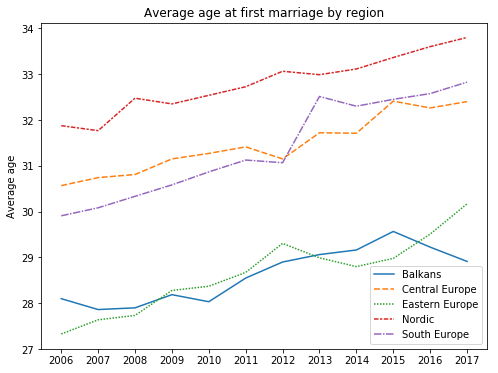

In [819]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(ax=ax, data = mean_eu).set_title("Average age at first marriage by region")
ax.set_ylabel("Average age")

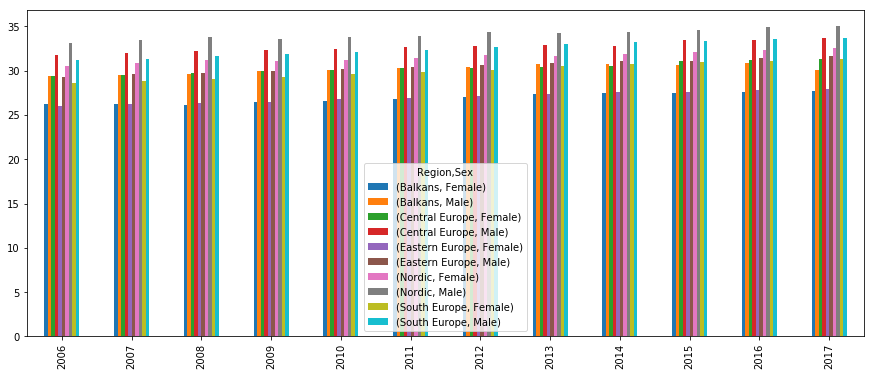

In [813]:
eu_mean.T.plot(kind="bar", figsize = (15, 6))

In [825]:
#Selecting only Spain and Lithuania
eu_mean_age_marriages.drop(columns = ["Region"], inplace = True)
mean_age_marriages_select = eu_mean_age_marriages.get((eu_mean_age_marriages.Country == "Spain") | 
                                                   (eu_mean_age_marriages.Country == "Lithuania"))


mean_age_marriages_select


,Country,Sex,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
8,Spain,Female,29.6,29.8,30.1,30.5,30.9,31.3,31.6,32.2,32.3,32.7,33.0,33.2
13,Lithuania,Female,25.1,25.5,25.8,26.2,26.5,26.7,NaN,27.1,27.3,27.5,27.9,27.8
44,Spain,Male,31.8,32.0,32.3,32.7,33.1,33.4,33.7,34.4,34.5,34.9,35.1,35.4
49,Lithuania,Male,27.4,27.8,28.0,28.6,28.7,29.0,NaN,29.5,29.7,28.9,30.3,30.5


In [826]:
# Reseting index
mean_age_marriages_select.set_index(["Country", "Sex"], inplace = True)


In [827]:
# Filling missing values in 2012 for Lithuania

mean_age_marriages_select = mean_age_marriages_select.interpolate(axis=1)

Text(0, 0.5, 'Average age')

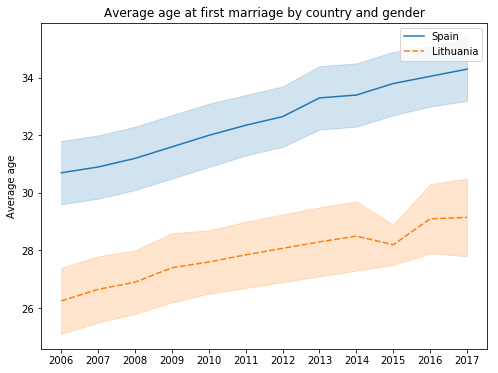

In [832]:
#mean_age_marriages_select.T.plot()
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(ax=ax, data = mean_age_marriages_select.T).set_title("Average age at first marriage by country and gender")
ax.set_ylabel("Average age")

In [958]:
#Reading in divorce sheet
divorce = pd.read_excel("./sources/SF_3_1_Marriage_divorce_rates.xlsx", sheet_name= 'DivorceRate', header = 3, skipfooter = 17)


In [959]:
#dropping Note column as it has no valuable info
divorce = divorce.drop(columns = ["Note", 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989])


In [960]:
# the data was read in as object due to missing values. Selecting columns to convert to numeric
cols = divorce.columns.drop('Country', "Gender")


In [961]:
# converting to numeric
divorce[cols] = divorce[cols].apply(pd.to_numeric, errors='coerce')

divorce_select = divorce.get((divorce.Country == "Spain") | (divorce.Country == "Lithuania"))
divorce_select

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
17,Lithuania,3.4,4.1,3.8,3.8,3.0,2.8,3.1,3.2,3.3,...,3.2,2.9,3.2,3.4,3.5,3.4,3.3,3.2,3.1,3.0
27,Spain,0.6,0.7,0.7,0.7,0.8,0.8,0.8,0.9,0.9,...,2.4,2.1,2.2,2.2,2.2,2.0,2.2,2.1,2.1,2.0


In [838]:
# setting index to country so I can plot transposed table
divorce.set_index("Country", inplace = True)
div_top = divorce.sort_values(2016, ascending = False).head(10)


In [839]:
div_top

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Lithuania,3.4,4.1,3.8,3.8,3.0,2.8,3.1,3.2,3.3,3.2,...,3.2,2.9,3.2,3.4,3.5,3.4,3.3,3.2,3.1,3.0
Latvia,4.0,4.2,5.6,4.0,3.3,3.1,2.5,2.5,2.6,2.5,...,2.9,2.4,2.4,4.0,3.6,3.5,3.1,2.6,3.1,3.1
Denmark,2.7,2.5,2.5,2.5,2.6,2.5,2.4,2.4,2.5,2.5,...,2.7,2.7,2.6,2.6,2.8,3.4,3.4,2.9,3.0,2.6
Estonia,3.7,3.7,4.3,3.9,3.8,5.2,4.0,3.8,3.2,3.3,...,2.6,2.4,2.2,2.3,2.4,2.5,2.4,2.6,2.5,2.5
Finland,2.6,2.6,2.6,2.5,2.7,2.7,2.7,2.6,2.7,2.7,...,2.5,2.5,2.5,2.5,2.4,2.5,2.5,2.5,2.5,NaN
Czech Republic,3.1,2.8,2.8,2.9,3.0,3.0,3.2,3.2,3.1,2.3,...,3.0,2.8,2.9,2.7,2.5,2.7,2.5,2.5,2.4,2.4
Sweden,2.3,2.3,2.5,2.5,2.5,2.6,2.4,2.4,2.3,2.4,...,2.3,2.4,2.5,2.5,2.5,2.8,2.7,2.5,2.4,2.4
Cyprus,0.6,0.5,0.7,0.8,0.9,1.2,1.1,1.3,1.3,1.7,...,2.1,2.2,2.3,2.3,2.4,2.2,2.2,2.1,2.3,NaN
Portugal,0.9,1.1,1.2,1.2,1.4,1.2,1.3,1.4,1.5,1.7,...,2.5,2.5,2.6,2.5,2.4,2.2,2.1,2.3,2.2,2.1


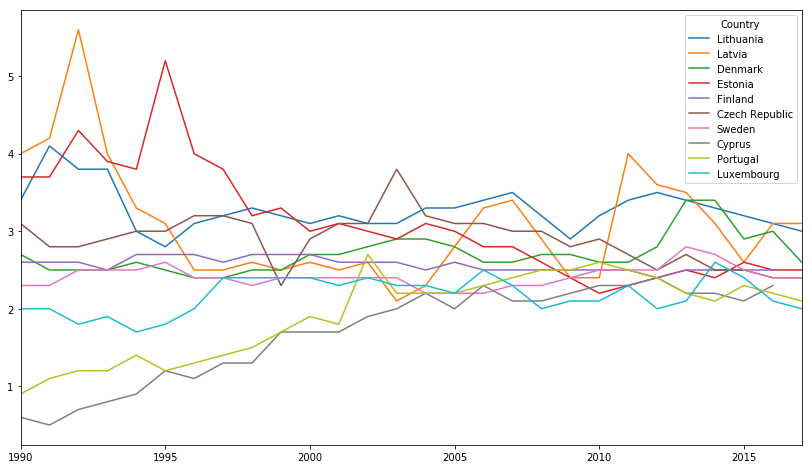

In [840]:
div_top.T.plot(figsize = (14,8))

In [842]:
previous_marriages = pd.read_excel("./sources/SF_3_1_Marriage_divorce_rates.xlsx", 
                                   sheet_name= 'PrevMaritalStatus', header = 3, skipfooter = 12)

In [843]:
previous_marriages = previous_marriages.drop(columns = ["Note", 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
                                                        1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 
                                                        1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000])


In [887]:
previous_marriages["Country"] = previous_marriages["Country"].ffill()
previous_marriages = previous_marriages.rename(columns = {"Unnamed: 2": "Previous_marital_status"})
previous_marriages_select = previous_marriages.get((previous_marriages["Country"] == "Spain") | 
                                                  (previous_marriages["Country"] == "Lithuania"))
previous_marriages_select.set_index(["Country", "Previous_marital_status"], inplace = True)
previous_marriages_select

2001      2002      2003      2004  \
Country   Previous_marital_status                                           
Lithuania Single never married      78.7917   78.9158   79.3264   78.1345   
          Divorced                  19.1078   19.2359   18.6552   20.0225   
          Widowed                   2.10052   1.84835   2.01845   1.84304   
Spain     Single never married      93.5867   93.1057   92.5422   91.6044   
          Divorced                  5.75301   6.18587   6.70406   7.65413   
          Widowed                  0.660312  0.708423  0.753764  0.741453   

                                       2005      2006      2007      2008  \
Country   Previous_marital_status                                           
Lithuania Single never married      77.9104   77.4711        ..    77.349   
          Divorced                  20.2262   20.5474        ..   20.9658   
          Widowed                   1.86337   1.98155        ..   1.68516   
Spain     Single never married      91.2334   89.9368   89.1438   88.3244   
          Divorced                  8.07142   9.33888    10.146   10.9534   
          Widowed                  0.695144  0.724329  0.710207  0.722194   

                                       2009      2010      2011      2012  \
Country   Previous_marital_status                                           
Lithuania Single never married      78.8726   79.2969   78.2321   78.7937   
          Divorced                  19.6232   19.0871   20.1628   19.6404   
          Widowed                   1.50424   1.61601   1.60502    1.5659   
Spain     Single never married      86.8358   85.8513    85.383   85.2647   
          Divorced                  12.3279   13.3442   13.7783   13.9138   
          Widowed                  0.836345  0.804451  0.838706  0.821521   

                                       2013     2014      2015      2016  
Country   Previous_marital_status                                         
Lithuania Single never married      78.4137  77.7527   78.1007   76.7579  
          Divorced                  19.9936  20.6643   20.4712   21.6471  
          Widowed                   1.59265  1.58296   1.42812   1.59507  
Spain     Single never married      84.2345  84.2867   83.7577   83.0259  
          Divorced                  14.9521   14.918   15.4854    16.185  
          Widowed                  0.813427  0.79529  0.756971  0.789083

In [877]:
previous_marriages_spain = previous_marriages.get(previous_marriages["Country"] == "Spain")
previous_marriages_lithuania=previous_marriages.get(previous_marriages["Country"] == "Lithuania")

In [878]:
previous_marriages_lithuania.set_index(["Country", "Previous_marital_status"], inplace = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1306b2ac8>],
      dtype=object)

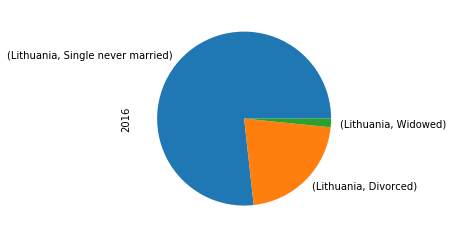

In [879]:
previous_marriages_lithuania[2016].T.plot.pie(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x130b17710>],
      dtype=object)

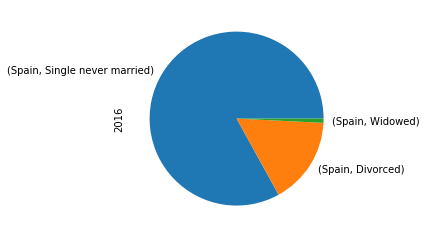

In [880]:
previous_marriages_spain.set_index(["Country", "Previous_marital_status"], inplace = True)
previous_marriages_spain[2016].T.plot.pie(subplots=True)

In [962]:
marriages = pd.read_excel("./sources/SF_3_1_Marriage_divorce_rates.xlsx", sheet_name= 'MarriageRates', header = 3, skipfooter = 21)

In [963]:
marriages = marriages.drop(columns = ["Note", 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989])
marriages.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Australia,6.9,6.6,6.6,6.411,6.2,6.100,5.8,5.8,5.9,...,5.5,5.5,5.4,5.4,5.4,5.1,5.2,4.8,4.9,NaN
1,Austria,5.9,5.7,5.8,5.7,5.5,5.400,5.3,5.2,4.9,...,4.2,4.3,4.5,4.3,4.6,4.3,4.4,5.1,5.1,5.1
2,Belgium,6.5,6.1,5.8,5.4,5.1,5.100,5.0,4.7,4.4,...,4.3,4,3.9,3.7,3.8,3.4,3.6,4,3.9,3.9
3,Canada,6.8,6.1,5.8,5.6,5.5,5.500,5.3,5.1,5.1,...,4.4,..,..,..,..,..,..,..,..,NaN
4,Chile,..,..,6.6,6.7,6.5,6.058,5.8,5.3,5.0,...,3.3,3.3,3.53112,3.755,3.65358,3.485,3.64037,3.429,..,NaN


In [964]:
cols = marriages.columns.drop('Country')
marriages[cols] = marriages[cols].apply(pd.to_numeric, errors='coerce')
marriages.set_index("Country", inplace = True)
mar_top = marriages.sort_values(2016, ascending = False).head(10)
mar_top

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Cyprus,9.700000,10.500000,8.000000,9.700000,9.700000,10.200000,8.700000,10.70000,11.400000,13.200000,...,7.800000,7.800000,7.300000,7.300000,6.700000,6.400000,6.300000,7.200000,7.500000,NaN
Lithuania,9.800000,9.200000,8.100000,6.400000,6.400000,6.100000,5.700000,5.30000,5.200000,5.100000,...,7.500000,6.500000,6.000000,6.300000,6.900000,6.900000,7.600000,7.600000,7.400000,7.5
Romania,8.300000,8.000000,7.700000,7.100000,6.800000,6.800000,6.600000,6.50000,6.500000,6.200000,...,7.300000,6.600000,5.700000,5.200000,5.400000,5.400000,5.900000,6.300000,6.800000,NaN
Malta,7.100000,7.100000,6.600000,6.800000,6.700000,6.300000,6.400000,6.40000,6.500000,6.400000,...,6.100000,5.700000,6.300000,6.200000,6.700000,6.100000,6.600000,6.700000,6.700000,NaN
Latvia,8.900000,8.400000,7.200000,5.700000,4.600000,4.500000,3.900000,4.00000,4.000000,3.900000,...,5.900000,4.600000,4.400000,5.200000,5.500000,5.700000,6.300000,6.900000,6.600000,6.8
Slovak Republic,7.600000,6.200000,6.400000,5.800000,5.300000,5.100000,5.100000,5.20000,5.100000,5.100000,...,5.300000,4.900000,4.700000,4.700000,4.800000,4.700000,4.900000,5.300000,5.500000,5.8
Korea,9.300000,9.600000,9.600000,9.000000,8.700000,8.700000,9.400000,8.40000,8.000000,7.600000,...,6.600000,6.200000,6.500000,6.600000,6.500000,6.400000,6.000000,5.900000,5.500000,NaN
Costa Rica,7.494382,7.205462,6.588158,6.303035,6.454277,7.080523,6.695512,6.72902,6.711192,6.763685,...,5.684262,5.352024,5.283538,5.446905,5.612516,5.458112,5.428107,5.486497,5.463388,NaN
Denmark,6.100000,6.000000,6.200000,6.100000,6.800000,6.600000,6.800000,6.50000,6.500000,6.700000,...,6.800000,6.000000,5.600000,4.900000,5.100000,4.900000,5.000000,5.100000,5.400000,5.5


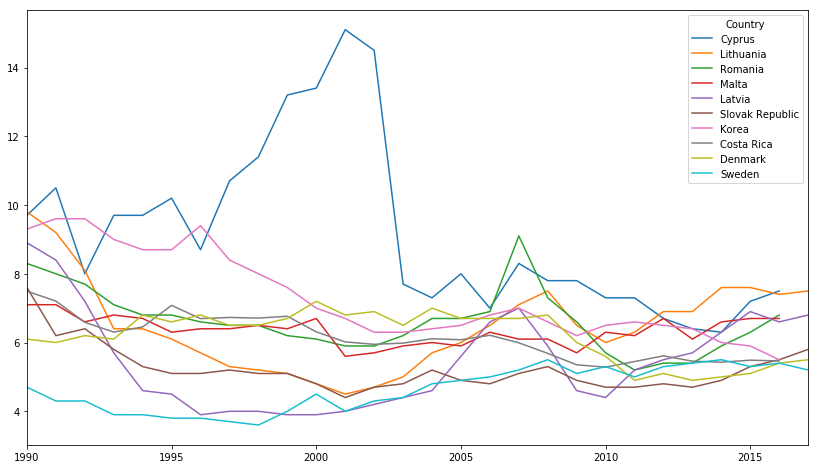

In [965]:
mar_top.T.plot(figsize = (14,8))

In [516]:
marriages_select = marriages.get(
    (marriages["Country"] == "Spain") | (marriages["Country"] == "Lithuania"))

In [517]:
marriages_select

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
20,Lithuania,9.8,9.2,8.1,6.4,6.4,6.1,5.7,5.3,5.2,...,7.5,6.5,6,6.3,6.9,6.9,7.6,7.6,7.4,7.5
30,Spain,5.7,5.6,5.6,5.1,5.1,5.1,4.9,5,5.2,...,4.2,3.7,3.6,3.4,3.5,3.3,3.4,3.6,3.7,3.7


In [425]:
marriage_length = pd.read_csv("series-1732322112c.csv")


In [426]:
marriage_length = marriage_length[['PERIOD', "VALUE"]]

In [427]:
marriage_length.set_index("PERIOD", inplace = True)

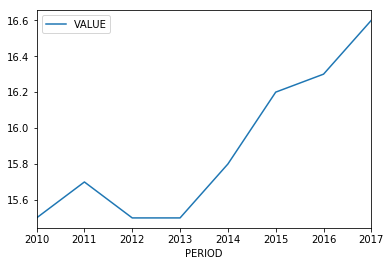

In [428]:
marriage_length.plot()

In [572]:
marriage_length_select = pd.read_excel("demo_ndivdur.xls", header = 8, skipfooter = 3)

In [900]:
marriage_length_select_spain = marriage_length_select.get(marriage_length_select.GEO == "Spain")
marriage_length_select_spain["share 2017"] = marriage_length_select_spain["2017"].apply(lambda x: x/97960)

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [901]:
marriage_length_select_spain

,GEO,DURATION/TIME,2010,2011,2012,2013,2014,2015,2016,2017,share 2017
0,Spain,Total,102690,103290,104262,95427,100746,96562,96824,97960,1.000000
1,Spain,1 year,1630,1517,1590,1571,1473,1332,1323,1571,0.016037
2,Spain,2 years,3695,3187,3149,2788,2817,2529,2470,2782,0.028399
3,Spain,3 years,4857,4546,4242,3902,3663,3260,3128,3298,0.033667
4,Spain,4 years,4969,5073,5155,4590,4544,4007,3879,3668,0.037444
5,Spain,5 years,4911,5165,5348,4998,4998,4268,4083,4125,0.042109
6,Spain,6 years,4902,4799,5124,5102,5161,4487,4426,4123,0.042089
7,Spain,7 years,4682,4726,4801,4653,4987,4869,4261,4015,0.040986
8,Spain,8 years,4177,4314,4451,4058,4666,4417,4328,4131,0.042170
9,Spain,9 years,3983,4097,4048,4040,4236,4140,4270,4119,0.042048


In [717]:
marriage_length_grouped = pd.read_excel("./sources/marriage_length.xls", header = 8, skipfooter = 3)

In [928]:
marriage_length_grouped_spain = marriage_length_grouped.get(marriage_length_grouped.GEO == "Spain")
marriage_length_grouped_spain["share 2017"] = marriage_length_grouped_spain["2017"].apply(lambda x: x/97960)
marriage_length_grouped_spain.set_index("DURATION/TIME", inplace = True)
marriage_length_grouped_spain = marriage_length_grouped_spain.drop(["Total"])
marriage_length_grouped_spain['cumulative'] = marriage_length_grouped_spain["share 2017"].cumsum()
marriage_length_grouped_spain

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,GEO,2010,2011,2012,2013,2014,2015,2016,2017,share 2017,cumulative
DURATION/TIME,,,,,,,,,,,
Less than 5 years,Spain,15386,14548,14427,13069,12782,11369,11021,11559,0.117997,0.117997
From 5 to 9 years,Spain,22655,23101,23772,22851,24048,22181,21368,20513,0.209402,0.327399
From 10 to 14 years,Spain,17837,18349,18095,16887,18055,16991,17945,17854,0.182258,0.509657
From 15 to 19 years,Spain,14925,14587,14646,13298,14244,14021,14469,14521,0.148234,0.657891
From 20 to 24 years,Spain,12006,12467,12565,11115,11837,11440,11227,11061,0.112913,0.770804
From 25 to 29 years,Spain,7945,7983,8301,7258,8173,8482,8670,9062,0.092507,0.863312
From 30 to 34 years,Spain,6123,6027,5863,4910,5101,5276,5040,5749,0.058687,0.921999
35 years or over,Spain,5813,6228,6593,6039,6506,6802,7084,7641,0.078001,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1319d8c50>],
      dtype=object)

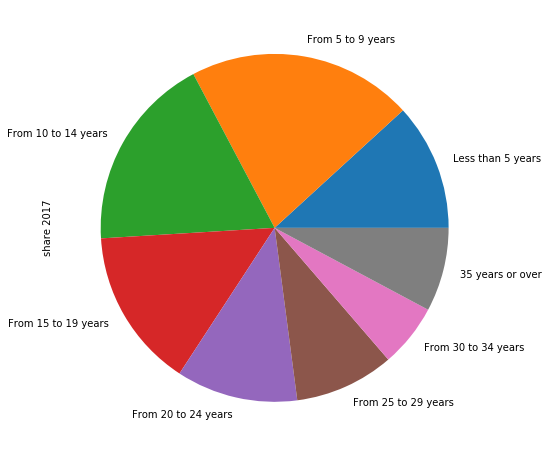

In [929]:
spain_plot1 = marriage_length_grouped_spain.drop(columns = ["GEO", "2010", "2011", "2012", 
                                                            "2013", "2014", "2015", "2016", "2017"])
spain_plot.plot.pie(subplots = True, figsize = (8,8), legend = None)

In [927]:
marriage_length_grouped_lithuania = marriage_length_grouped.get(marriage_length_grouped.GEO == "Lithuania")
marriage_length_grouped_lithuania["share 2017"] = marriage_length_grouped_lithuania["2017"].apply(lambda x: x/8518)
marriage_length_grouped_lithuania.set_index("DURATION/TIME", inplace = True)
marriage_length_grouped_lithuania = marriage_length_grouped_lithuania.drop(["Total"])
marriage_length_grouped_lithuania['cumulative'] = marriage_length_grouped_lithuania["share 2017"].cumsum()
marriage_length_grouped_lithuania

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,GEO,2010,2011,2012,2013,2014,2015,2016,2017,share 2017,cumulative
DURATION/TIME,,,,,,,,,,,
Less than 5 years,Lithuania,2229,2219,2088,1896,1961,1902,1902,1628,0.191125,0.191125
From 5 to 9 years,Lithuania,1960,2233,2441,2531,2487,2302,2178,2013,0.236323,0.427448
From 10 to 14 years,Lithuania,1440,1381,1357,1179,1291,1306,1282,1477,0.173398,0.600845
From 15 to 19 years,Lithuania,1534,1379,1267,1160,1017,1033,885,830,0.097441,0.698286
From 20 to 24 years,Lithuania,1396,1413,1428,1339,1237,1050,905,802,0.094154,0.792440
From 25 to 29 years,Lithuania,779,897,984,927,937,901,858,837,0.098263,0.890702
From 30 to 34 years,Lithuania,396,489,488,553,503,496,496,519,0.060930,0.951632
35 years or over,Lithuania,272,330,346,389,373,381,373,412,0.048368,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x131a1cac8>],
      dtype=object)

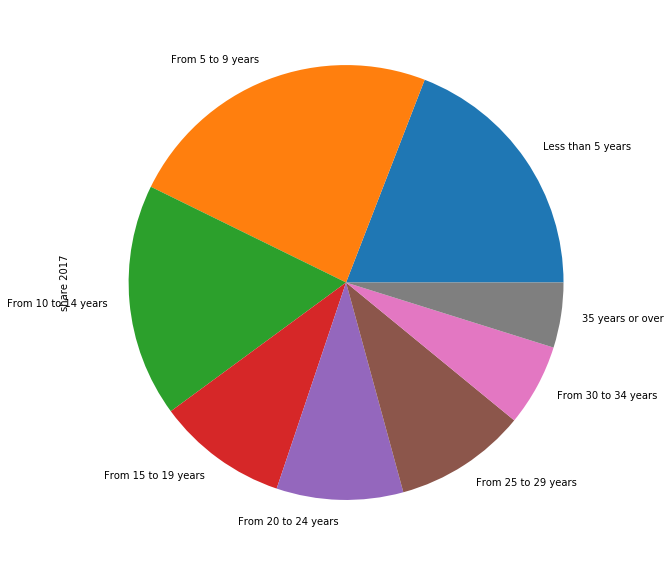

In [930]:
lt_plot1 = marriage_length_grouped_lithuania.drop(columns = ["GEO", "2010", "2011", "2012", "2013", 
                                                             "2014", "2015", "2016", "2017"])
lt_plot.plot.pie(subplots = True, figsize = (10,10), legend = None)

In [719]:
divorce_by_kids = pd.read_excel("./sources/SF_3_2_Family_dissolution_children.xlsx", sheet_name= 'Table SF3.2.B', 
                        header = 5, skipfooter =15)

In [579]:
divorce_by_kids = divorce_by_kids.drop(columns = ["Unnamed: 0", "Unnamed: 3", "Unnamed: 8"])
divorce_by_kids = divorce_by_kids.rename(columns = {"Unnamed: 1": "Country", "Unnamed: 2": "Divorce_no_children", 
                                  "Total": "Total_with_children", "Unnamed: 9": "Unknown"})
divorce_by_kids["Unknown"] = divorce_by_kids["Unknown"].apply(pd.to_numeric, errors='coerce')

In [580]:
divorce_by_kids_select = divorce_by_kids.get(
    (divorce_by_kids["Country"] == "Spain") | (divorce_by_kids["Country"] == "Lithuania"))

In [581]:
divorce_by_kids_select = divorce_by_kids_select.fillna(0).set_index("Country")

In [582]:
divorce_by_kids_select

,Divorce_no_children,Total_with_children,1 child,2 children,3 or more children,Unknown
Country,,,,,,
Spain,44.912695,48.973204,31.838897,15.090325,2.043982,6.114101
Lithuania,37.314749,62.685251,41.928370,17.281228,3.475653,0.000000


In [583]:
divorce_by_kids_select_no = divorce_by_kids_select.drop(["Total_with_children"], axis = 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12dedfc50>,
      dtype=object)

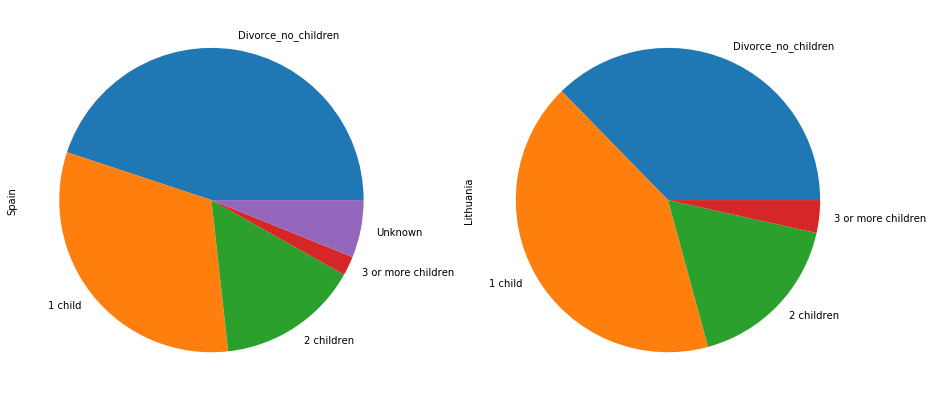

In [584]:
divorce_by_kids_select_no.T.plot.pie(subplots = True, legend = None, figsize = (15,15))
